In [2]:
from scipy import stats
from scipy.stats import uniform
import numpy as np

In [2]:
vib1 = uniform.rvs(-5,10,300)
vib2 = uniform.rvs(-5,10,300)

In [282]:
m_theor = 0
sigma_theor = np.sqrt(25/3)

In [283]:
np.sqrt(25/3)

2.886751345948129

In [284]:
print("Выборка 1:  Среднее {}, Оценка дисперсии {}, Оценка с.к.о {}".format(np.mean(vib1),np.var(vib1),np.std(vib1)))
print("Выборка 2:  Среднее {}, Оценка дисперсии {}, Оценка с.к.о {}".format(np.mean(vib2),np.var(vib2),np.std(vib2)))
pooled = np.concatenate([vib1, vib2])
print("Pooled:     Среднее {}, Оценка дисперсии {}, Оценка с.к.о {}".format(np.mean(pooled),np.var(pooled),np.std(pooled)))

Выборка 1:  Среднее 0.05302585104427721, Оценка дисперсии 9.20888531486028, Оценка с.к.о 3.034614524920798
Выборка 2:  Среднее -0.2845908208764707, Оценка дисперсии 7.961918569477399, Оценка с.к.о 2.8216871849085963
Pooled:     Среднее -0.11578248491609677, Оценка дисперсии 8.613898196458551, Оценка с.к.о 2.9349443259555286


In [285]:
# 2.Однопараметрические критерии
# выборочное значение(статистика критерия)
def z_test_Z(vib, m0):
    return (np.mean(vib) - m0) * np.sqrt(len(vib)) / sigma_theor
    
def t_test_Z(vib, m0):
    return (np.mean(vib) - m0) * np.sqrt(len(vib)) / np.std(vib)

def chi2_test_m_Z(vib, sigma):
    sum0 = 0
    for i in vib:
        sum0 += np.power((i-m_theor), 2)
    s0 = sum0/len(vib)
    return len(vib)*s0/np.power(sigma, 2)
    
def chi2_test_wo_m_Z(vib, sigma):
    sum0 = 0
    for i in vib:
        sum0 += np.power((i-np.mean(vib)), 2)
    s0 = sum0/(len(vib)-1)
    return (len(vib)-1)*s0/np.power(sigma, 2)

In [299]:
#находим выборочное значение
print("1. выбор-е зн-е: {} ".format(z_test_Z(vib1, m0=0.3)))
print("2. выбор-е зн-е: {} ".format(t_test_Z(vib1, m0=0)))
print("3. выбор-е зн-е: {} ".format(chi2_test_m_Z(vib1, sigma=np.sqrt(25/3))))
print("4. выбор-е зн-е: {} ".format(chi2_test_wo_m_Z(vib1, sigma=3.31)))


1. выбор-е зн-е: -1.4818448937343367 
2. выбор-е зн-е: 0.3026528324076496 
3. выбор-е зн-е: 331.62109400661313 
4. выбор-е зн-е: 252.157756360209 


In [300]:
#находим p-value
#
print("1. p = {}".format(2*min(stats.norm.cdf(z_test_Z(vib1, m0=0.3), 0, 1), 1-stats.norm.cdf(z_test_Z(vib1, m0=0.3), 0, 1))))
#
print("2. p = {}".format(2*min(stats.t.cdf(t_test_Z(vib1, m0=0), 299), 1-stats.t.cdf(t_test_Z(vib1, m0=0), 299))))
#
print("3. p = {}".format(2*min(stats.chi2.cdf(chi2_test_m_Z(vib1, sigma=np.sqrt(25/3)), 300), 1-stats.chi2.cdf(chi2_test_m_Z(vib1, sigma=np.sqrt(25/3)), 300))))
#
print("4. p = {}".format(2*min(stats.chi2.cdf(chi2_test_wo_m_Z(vib1, sigma=3.31), 299), 1-stats.chi2.cdf(chi2_test_wo_m_Z(vib1, sigma=3.31), 299))))

1. p = 0.1383815705855274
2. p = 0.7623648882119565
3. p = 0.20225310102342764
4. p = 0.045696680893733424


In [288]:
stats.ttest_1samp(vib1, 0)

Ttest_1sampResult(statistic=0.30214798996709913, pvalue=0.7627493137036137)

In [289]:
#3.Двухвыборочные критерии


def two_smpl_f_test_Z(smpl1, smpl2):
    sum01 = 0
    sum02 = 0
    for i in smpl1:
        sum01 += np.power((i-m_theor), 2)
    for i in smpl2:
        sum02 += np.power((i-m_theor), 2)
        
    s01 = sum01/len(smpl1)
    s02 = sum02/len(smpl2)
    return s01/s02

def two_smpl_f_test_wo_m_Z(smpl1, smpl2):
    sum01 = 0
    sum02 = 0
    for i in smpl1:
        sum01 += np.power((i-np.mean(smpl1)), 2)
    for i in smpl2:
        sum02 += np.power((i-np.mean(smpl2)), 2)   
    s1 = sum01/len(smpl1)
    s2 = sum02/len(smpl2)
    return s1/s2


In [301]:
print("1. выбор-е зн-е: {} ".format(stats.ttest_ind(vib1, vib2).statistic))
print("2. выбор-е зн-е: {} ".format(two_smpl_f_test_Z(vib1, vib2)))
print("3. выбор-е зн-е: {} ".format(two_smpl_f_test_wo_m_Z(vib1, vib2)))

1. выбор-е зн-е: 1.4088480806275407 
2. выбор-е зн-е: 1.1453188556849563 
3. выбор-е зн-е: 1.1566163650760288 


In [3]:
# p-value 
print("1. p = {}".format(stats.ttest_ind(vib1, vib2).pvalue))
print("2. p = {}".format(2*min(stats.f.cdf(two_smpl_f_test_Z(vib1, vib2), 300, 300), 1-stats.f.cdf(two_smpl_f_test_Z(vib1, vib2), 300, 300))))
print("3. p = {}".format(2*min(stats.f.cdf(two_smpl_f_test_wo_m_Z(vib1, vib2), 299, 299), 1-stats.f.cdf(two_smpl_f_test_wo_m_Z(vib1, vib2), 299, 299))))

NameError: name 'vib1' is not defined

In [304]:
#4.Исследование распределений статистик критерия
n=1000
z_value = []
p_value = []
for i in range(n):
    vib01 = uniform.rvs(-5,10,300)
    vib02 = uniform.rvs(-5,10,300)
    z_value.append(stats.ttest_ind(vib01, vib02).statistic)
    p_value.append(stats.ttest_ind(vib01, vib02).pvalue)

print("Выборка z-value:  Среднее {}, Оценка дисперсии {}, Оценка с.к.о {}".format(np.mean(z_value),np.var(z_value),np.std(z_value)))
print("Выборка p-value:  Среднее {}, Оценка дисперсии {}, Оценка с.к.о {}".format(np.mean(p_value),np.var(p_value),np.std(p_value)))

Выборка z-value:  Среднее 0.0038140011824351846, Оценка дисперсии 0.9636975380793796, Оценка с.к.о 0.9816809757142998
Выборка p-value:  Среднее 0.5012666538603638, Оценка дисперсии 0.07937341434405326, Оценка с.к.о 0.28173287764130983


c:\users\hom\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


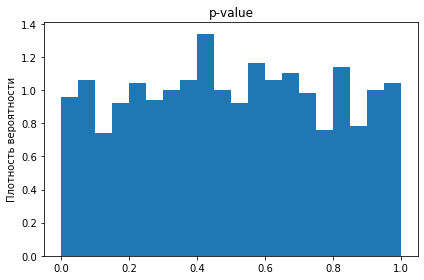

In [305]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# гистограмма
n, bins, patches = ax.hist(p_value, 20, normed=True)

ax.set_title("p-value")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()

c:\users\hom\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


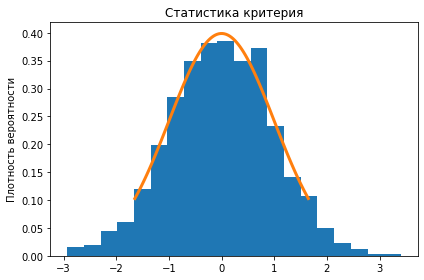

In [306]:

fig, ax = plt.subplots()

# гистограмма
n, bins, patches = ax.hist(z_value, 20, normed=True)

# график
x = np.linspace(stats.t.ppf(0.05, 300+300-2), stats.t.ppf(0.95, 300+300-2), 100)
ax.plot(x, stats.t.pdf(x, 300+300-2), lw=3, alpha=1)

ax.set_title("Статистика критерия")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()

c:\users\hom\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


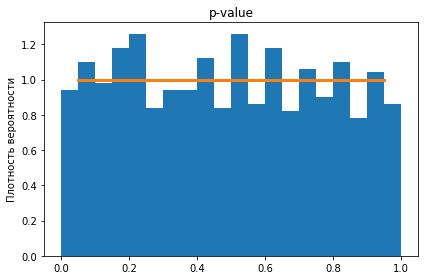

In [297]:
fig, ax = plt.subplots()

# гистограмма
n, bins, patches = ax.hist(p_value, 20, normed=True)

x = np.linspace(stats.uniform.ppf(0.05), stats.uniform.ppf(0.95), 100)
ax.plot(x, stats.uniform.pdf(x), lw=3, alpha=1)

ax.set_title("p-value")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()